In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src import train, generate, eval
from modules.config import read_config
import modules.plots as plots
from modules.datageneration import load_data, data_functions
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
BASE_DIR = "../tests/dataset-tests/sin50-20k-s03/"
PROFILE = "sin50-2x64-s03"

In [4]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]
DATASET_NAME = dataset_config["NAME"]

====== Generating profile sin-50x-20k-s03 ======
Train: (-2, 2)
Y-space: -140.96905720983696 - 128.1718034885116
In Domain: (-2, 2)
Y-space: -132.87679076109734 - 126.37280627344614
Out Domain: (-4, 4)
Y-space: -159.69451017974504 - 154.52678292973857


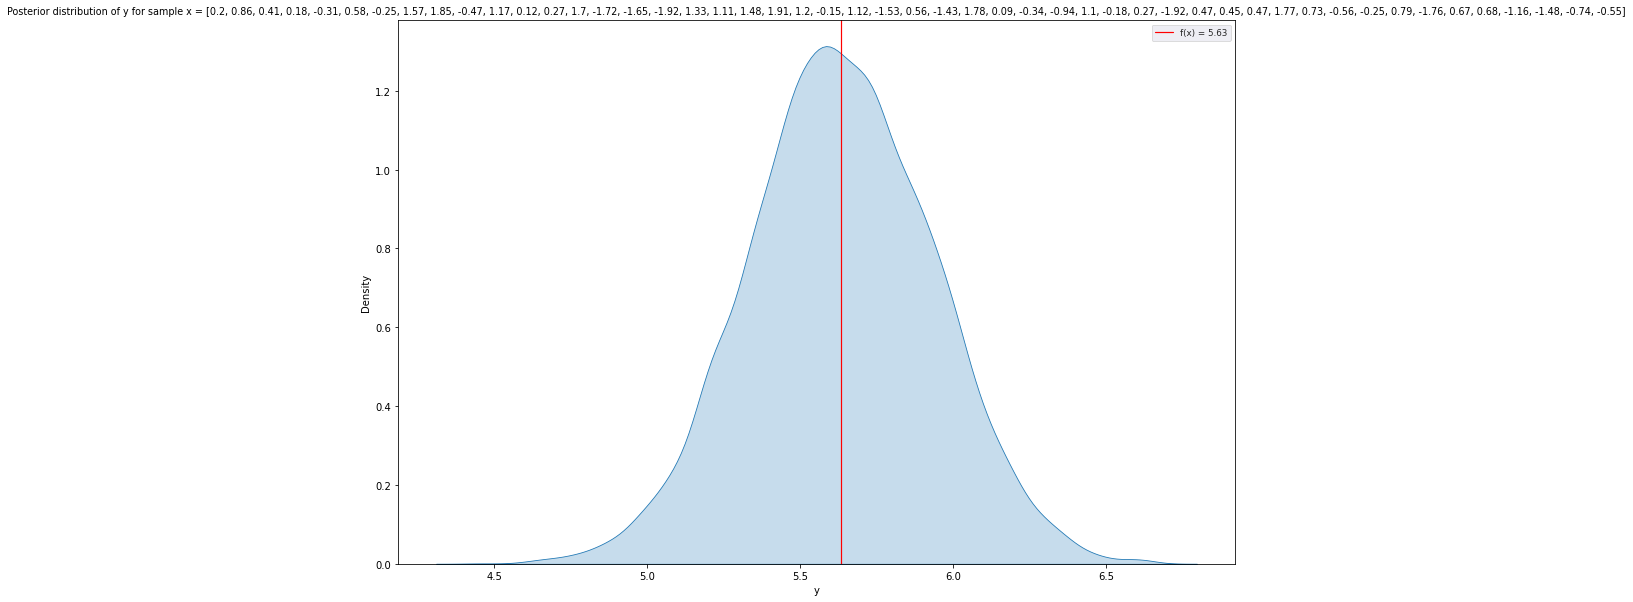

In [5]:
if True:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [6]:
(x_train, y_train), (x_val, y_val), (x_test_in_domain, y_test_in_domain), (x_test_out_domain, y_test_out_domain) = load_data(f"{BASE_DIR}/datasets/{DATASET_NAME}")

In [7]:
i = 0
x_test_out_domain[i], y_test_out_domain[i]

(tensor([-3.6597,  2.9371, -3.8795, -2.6381, -2.7927,  3.8930,  3.7121,  2.3767,
         -2.0990, -3.9962, -3.4285, -2.3965, -2.2091, -3.7354,  2.3094, -2.2818,
         -2.6946,  3.5796,  2.5434,  3.0583, -3.4495,  3.1146, -3.2370, -2.3046,
         -3.0964,  3.2534,  3.3976,  3.4096,  2.7178,  2.2566,  2.2939, -3.1301,
         -2.7462,  2.8302,  2.8048, -2.2210,  2.0376,  3.0724,  3.8512,  2.8755,
         -2.1678, -3.9729,  2.6471,  2.7309, -3.0122,  3.4915,  2.3229,  3.8465,
         -3.1448, -2.4133]),
 tensor([-43.9956]))

In [8]:
#Min y and max y of the train data
y_min = y_train.min()
y_max = y_train.max()
print(f"Train Data: | y_min: {y_min}, y_max: {y_max}")

#Min y and max y of the train data
y_min = y_test_in_domain.min()
y_max = y_test_in_domain.max()
print(f"Test Data in domain: | y_min: {y_min}, y_max: {y_max}")

#Min y and max y of the train data
y_min = y_test_out_domain.min()
y_max = y_test_out_domain.max()
print(f"Test data out domain: | y_min: {y_min}, y_max: {y_max}")

Train Data: | y_min: -140.96905517578125, y_max: 128.1717987060547
Test Data in domain: | y_min: -132.8767852783203, y_max: 126.372802734375
Test data out domain: | y_min: -159.6945037841797, y_max: 154.5267791748047
